## **Introduction and importing libraries** 

In [0]:
#Extended Kalman filter : Mobile Robot
# Author: Rumit Kumar

# Import support libraries

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from numpy.linalg import inv

## **Initialization Parameters**

In [0]:
dt = 0.1

states = np.array([[0], 
                   [0], 
                   [0]])      # Initial state of the robot
sigma_x = 0.2
sigma_y = 0.2
sigma_theta = 0.2

q = np.array([[sigma_x*sigma_x, 0, 0], 
     [0, sigma_y*sigma_y, 0], 
     [0, 0, sigma_theta*sigma_theta]])  # Q-Matrix

sigma_xr = 0.2
sigma_yr = 0.2
sigma_theta_r = 0.2

r = np.array([[sigma_xr*sigma_xr, 0, 0], 
              [0, sigma_yr*sigma_yr, 0],
             [0, 0, sigma_theta_r*sigma_theta_r]]) # R-Matrix

u= np.array([[1],
             [0.3]]) # Linear and angular velocity respectively

p= np.identity(3)

f = np.identity(3)

b = np.array([[dt*np.cos(float(states[2])), 0],
              [dt*np.sin(float(states[2])), 0],
             [0, -dt]])

h = np.array([[1, 0, 0], 
              [0, 1, 0],
              [0 , 0, 1]])

final_time = 20

no_of_steps = int(final_time/dt)

t_arr = np.linspace(0,final_time, no_of_steps)

xdata = states


xpos_arr_true = []
ypos_arr_true = []
theta_arr_true = []
x_data_arr = []

for i in range(0, len(t_arr)):
#   print(i)
  xdata = np.matmul(F,xdata) + np.matmul(b,u)
  b = np.array([[dt*np.cos(float(xdata[2])), 0],
              [dt*np.sin(float(xdata[2])), 0],
             [0, -dt]])
  xpos_arr_true.append(float(xdata[0]))
  ypos_arr_true.append(float(xdata[1]))
  theta_arr_true.append(float(xdata[2]))

  x_data_arr.append(xdata)
# print(xpos_arr_true)

##**Main Recursive Loop**

In [0]:
xpos_arr = []
ypos_arr = []
theta_arr = []

xpos_meas = []
ypos_meas = []
theta_meas = []
time_arr = []
time_meas = []

k = 0
theta_k_minus_1 = 0

for j in range(0, no_of_steps):
    
    states_predict = x_data_arr[j] + 0.08*np.random.rand(3,1)
#     print(states_predict)
    A =   np.array([[1, 0, float(-dt*u[0]*np.sin(theta_k_minus_1))], 
                    [0, 1, float(dt*u[0]*np.cos(theta_k_minus_1))], 
                    [0, 0, 1]]) 
  
    p_predict = np.matmul(np.matmul(A,p), A.T) + q;    
#     print(A)


    k_t = np.matmul(p_predict, h.T)*inv((np.matmul(np.matmul(p_predict,h), h.T) + r))
  
#     print(k_t)
    
    k_t[np.isnan(k_t)] = 0
  
    states_meas = np.matmul(h, np.array([x_data_arr[j]]).T) + 0.2*np.random.rand(3,1)
#       print(states_meas.size)
    xpos_meas.append(float(states_meas[0][0])) 
    ypos_meas.append(float(states_meas[0][1]))
    theta_meas.append(float(states_meas[0][2]))
    time_meas.append(j*dt)
    
        
    states_correct = states_predict + np.matmul(k_t, (states_meas-np.matmul(h,states_predict)))
#     print(states_correct)
    P_correct = np.matmul((np.identity(3)- np.matmul(k_t,h)), p_predict)
#     states = states_correct
    theta_k_minus_1 = states_correct[0][2]
    
    p = P_correct
    xpos_arr.append(float(states_correct[0][0])) 
    ypos_arr.append(float(states_correct[0][1])) 
    theta_arr.append(float(states_correct[0][2])) 
    time_arr.append(j*dt)    

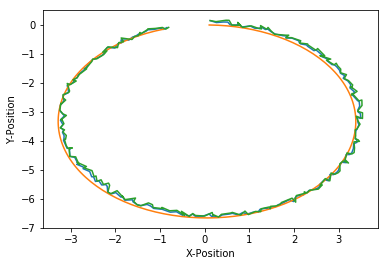

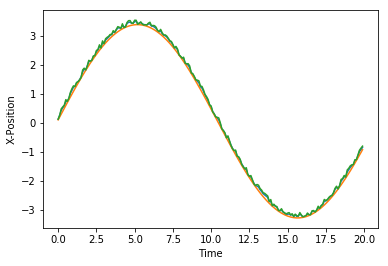

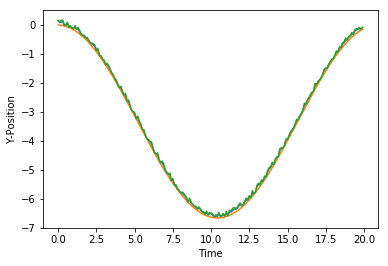

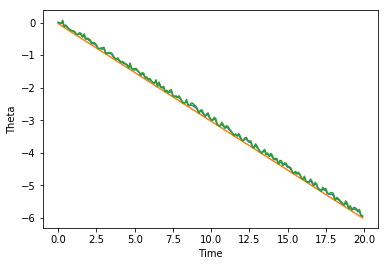

In [205]:
plt.plot(xpos_arr, ypos_arr, xpos_arr_true, ypos_arr_true,xpos_meas, ypos_meas)
plt.xlabel('X-Position')
plt.ylabel('Y-Position')
plt.show()


plt.plot(time_arr, xpos_arr, time_arr, xpos_arr_true, time_arr, xpos_meas)
plt.xlabel('Time')
plt.ylabel('X-Position')
plt.show()

plt.plot(time_arr, ypos_arr, time_arr, ypos_arr_true, time_arr, ypos_meas)
plt.xlabel('Time')
plt.ylabel('Y-Position')
plt.show()

plt.plot(time_arr, theta_arr, time_arr, theta_arr_true, time_arr, theta_meas)
plt.xlabel('Time')
plt.ylabel('Theta')
plt.show()
